In [1]:
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
    host='database-1.c3ieyo8m4v9o.ap-northeast-2.rds.amazonaws.com',
    port=3306,
    user='eda_team',
    password='123456',
    database='eda_project'
)
cur = conn.cursor()
cursor = conn.cursor(dictionary = True)
# cursor = conn.cursor(dictionary=True)

cursor.execute("select * from gas_car")
result = cursor.fetchall()

df_tra = pd.DataFrame(result)
conn.close()

In [2]:
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
    host='database-1.c3ieyo8m4v9o.ap-northeast-2.rds.amazonaws.com',
    port=3306,
    user='eda_team',
    password='123456',
    database='eda_project'
)
cur = conn.cursor()
cursor = conn.cursor(dictionary = True)
# cursor = conn.cursor(dictionary=True)

cursor.execute("select * from gas_distance")
result = cursor.fetchall()

df_dis = pd.DataFrame(result)
conn.close()

In [3]:
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
    host='database-1.c3ieyo8m4v9o.ap-northeast-2.rds.amazonaws.com',
    port=3306,
    user='eda_team',
    password='123456',
    database='eda_project'
)
cur = conn.cursor()
cursor = conn.cursor(dictionary = True)
# cursor = conn.cursor(dictionary=True)

cursor.execute("select * from gas_pollution")
result = cursor.fetchall()

df_poll = pd.DataFrame(result)
conn.close()

# 가정

## 1. 차량 이동 거리가 온실가스 수치에 비례한다
## 2. 연도별 온실가스 수치가 유지되고 있다.

#### 기후동행카드를 통해 차량 수를 줄이고 대중교통 이용을 늘리면 오염수치가 많이 내려갈 것으로 예상.

#### 실제 독일에서 진행한 9 유로 카드 제도를 통해 대중교통이 25% 늘고 온실가스도 180만톤을 줄인 사례가 있다.

- 온실가스의 평균치와 차량의 평균 이동 거리를 분석해본 결과 비례하다는 것을 알 수 있다.

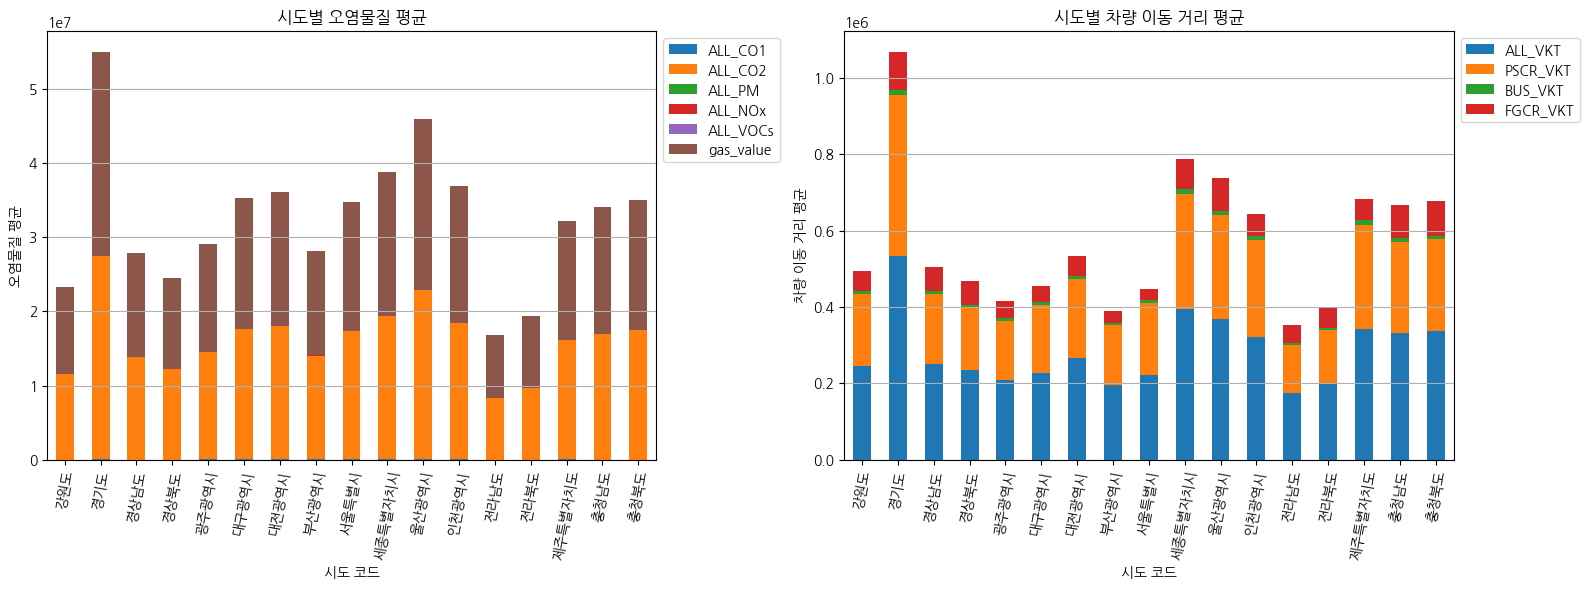

In [15]:
import matplotlib.pyplot as plt

pollutants_sum_by_sido = df_poll.groupby('sido_code')[['ALL_CO1', 'ALL_CO2', 'ALL_PM', 'ALL_NOx', 'ALL_VOCs', 'gas_value']].mean()
distance_sum_by_sido = df_dis.groupby('sido_code')[['ALL_VKT', 'PSCR_VKT', 'BUS_VKT', 'FGCR_VKT']].mean()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

pollutants_sum_by_sido.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('시도별 오염물질 평균')
axes[0].set_xlabel('시도 코드')
axes[0].set_ylabel('오염물질 평균')
axes[0].set_xticklabels(pollutants_sum_by_sido.index, rotation=80)
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[0].grid(axis='y')

distance_sum_by_sido.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('시도별 차량 이동 거리 평균')
axes[1].set_xlabel('시도 코드')
axes[1].set_ylabel('차량 이동 거리 평균')
axes[1].set_xticklabels(distance_sum_by_sido.index, rotation=80)
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

- 상관관계 수치를 통해 0.85xx 값으로 매우 관련이 있다는 것을 알 수 있다.

In [10]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(distance_sum_by_sido.sum(axis=1), pollutants_sum_by_sido.sum(axis=1))
print("피어슨 상관계수:", correlation)

피어슨 상관계수: 0.8540076405847953


- 관계 그래프 시각화

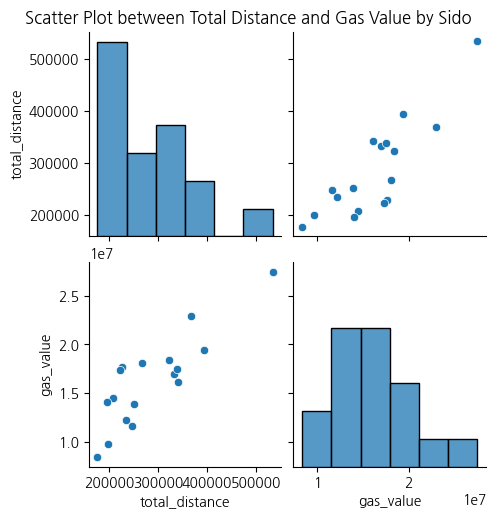

In [11]:
import seaborn as sns

merged_df = pd.merge(distance_sum_by_sido, pollutants_sum_by_sido, on='sido_code')
merged_df = merged_df.rename(columns={'ALL_VKT': 'total_distance'})

sns.pairplot(merged_df, vars=['total_distance', 'gas_value'], kind='scatter')
plt.suptitle('Scatter Plot between Total Distance and Gas Value by Sido', y=1.02)
plt.show()

- 산점도 그래프 시각화

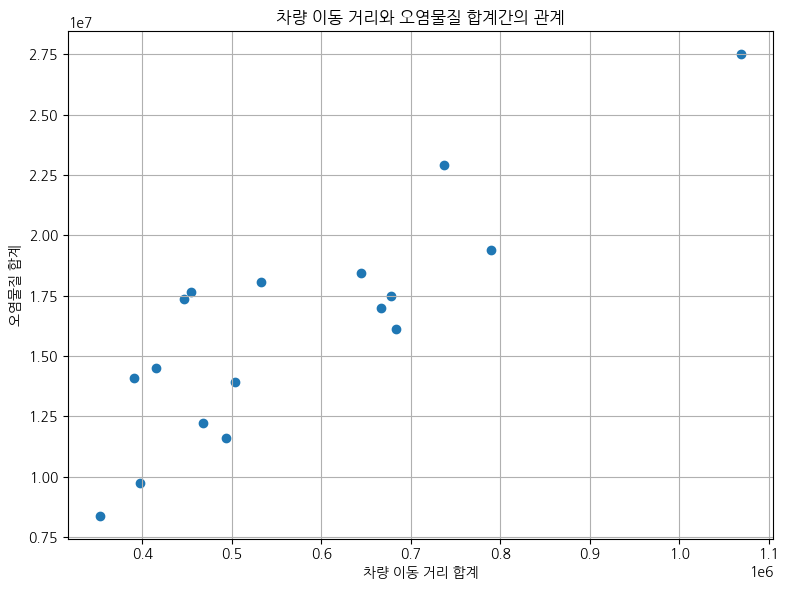

In [13]:
pollutants_sum_by_sido = df_poll.groupby('sido_code')[['ALL_CO1', 'ALL_CO2', 'ALL_PM', 'ALL_NOx', 'ALL_VOCs', 'gas_value']].mean()
distance_sum_by_sido = df_dis.groupby('sido_code')[['ALL_VKT', 'PSCR_VKT', 'BUS_VKT', 'FGCR_VKT']].mean()

plt.figure(figsize=(8, 6))
plt.scatter(distance_sum_by_sido.sum(axis=1), pollutants_sum_by_sido['gas_value'])
plt.title('차량 이동 거리와 오염물질 합계간의 관계')
plt.xlabel('차량 이동 거리 합계')
plt.ylabel('오염물질 합계')
plt.grid(True)
plt.tight_layout()
plt.show()

- 온실가스는 2018년도를 제외하면 유지가 되고 있음을 알 수 있다,

<Figure size 1200x600 with 0 Axes>

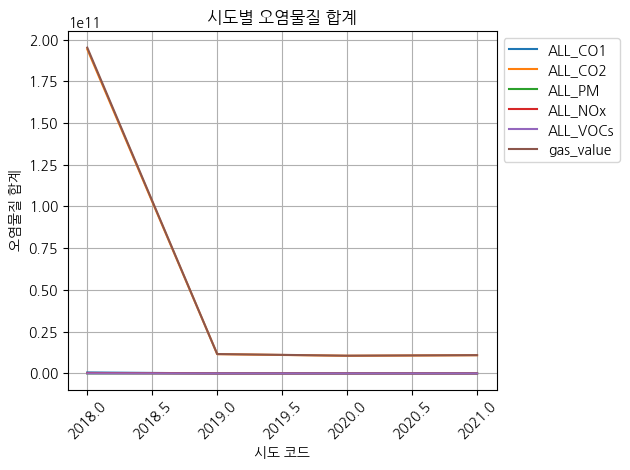

In [14]:
pollutants_sum_by_sido = df_poll.groupby('year')[['ALL_CO1', 'ALL_CO2', 'ALL_PM', 'ALL_NOx', 'ALL_VOCs', 'gas_value']].sum()

plt.figure(figsize=(12, 6))
pollutants_sum_by_sido.plot(kind='line')
plt.title('시도별 오염물질 합계')
plt.xlabel('시도 코드')
plt.ylabel('오염물질 합계')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

#### 기후동행카드를 통해 대중교통의 이용자 수를 늘리면 온실가스수치도 낮출 수 있다 예상한다.